In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
# using linspace(start, stop, num) to generate the values in X equally distributed between 0 and 20
# num is 50 (default)
X = np.linspace(0, 20)
y = -1*X + 2

In [80]:
def NAG(x,y,alpha,gamma):
    #1. Initialize parameters (theta_0 & theta_1) with zero.
    # and vt0 , vt1 with zero
    theta_0 = 0
    theta_1 = 0
    vt_0 = 0
    vt_1 = 0
    
    thetas_0 = []
    thetas_1 = []
    js = []
    vts_0 = []
    vts_1= []
    
    #10. Repeat from 2 to 9 until converge to the minimum or achieve maximum iterations.
    for i in range(1000):
        #2. Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x
        hx = theta_0 + (theta_1 * x)

        #3. Calculate Cost function 𝑱(theta_0,theta_1 )
        j = (np.sum(hx - y)**2)/(2*len(x))

        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        js.append(j)
        vts_0.append(vt_0)
        vts_1.append(vt_1)

        #4. Calculate theta tmp
        theta_0_tmp = theta_0 - gamma*vt_0
        theta_1_tmp = theta_1 - gamma*vt_1
        
        #5.
        h_tmp = theta_0_tmp + theta_1_tmp*x
        
     
        #6. Calculate the gradient
        g_theta_0_tmp = np.sum(h_tmp-y)/len(x)
        g_theta_1_tmp = np.sum((h_tmp-y) * x)/len(x)

        #7. Update vt:  Vt is exponentially weighted sum of alpha*gradient 
        vt_0 = (gamma*vts_0[i]) + (alpha*g_theta_0_tmp)
        vt_1 = (gamma*vts_1[i]) + (alpha*g_theta_1_tmp)

        #8. Update the parameters (simultaneously)
        theta_0 = theta_0_tmp - alpha*g_theta_0_tmp
        theta_1 = theta_1 - alpha*g_theta_1_tmp

        #9. Stop condition
        thetas_vactor_prev = np.array([thetas_0[-1], thetas_1[-1]])
        thetas_vector_curr = np.array([theta_0, theta_1])
        if i>1 and abs(js[i-1] - js[i]) < 0.0001 and (np.linalg.norm(thetas_vactor_prev) - np.linalg.norm(thetas_vector_curr)) < 0.0001:
            break;
        
    return i, thetas_0, thetas_1, js

In [81]:
i , thetas_0, thetas_1, js = NAG(X,y,0.001,0.9)

In [82]:
print(f'''the function has been iterating {i} times\nand the min cost is {js[-1]}''')

the function has been iterating 999 times
and the min cost is 0.06493675957121915


In [83]:
yhat = thetas_0[-1] + thetas_1[-1] * X

Text(0.5, 1.0, 'best peridected fitting line for 999 iterations')

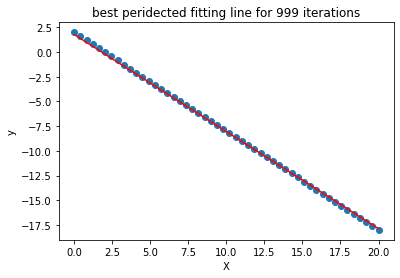

In [84]:
plt.scatter(X,y)
plt.plot(X, yhat,color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.title(f"best peridected fitting line for {i} iterations")

Text(0.5, 1.0, 'Epochs vs Cost function')

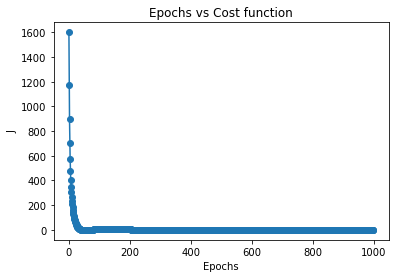

In [85]:
plt.plot(np.arange(i+1), js,'-o')
plt.xlabel("Epochs")
plt.ylabel("J")
plt.title("Epochs vs Cost function")

Text(0.5, 1.0, 'theta 0 vs cost function')

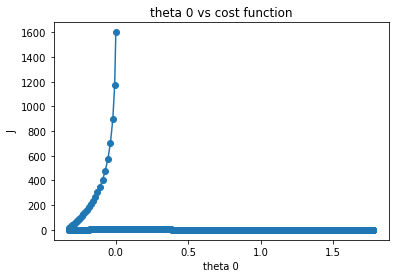

In [86]:
# theta 0
plt.plot(thetas_0,js,'-o')
plt.xlabel("theta 0")
plt.ylabel("J")
plt.title("theta 0 vs cost function")

Text(0.5, 1.0, 'theta 1 vs cost function')

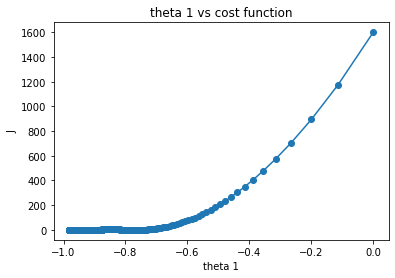

In [87]:
# theta 1
plt.plot(thetas_1,js, '-o')
plt.xlabel("theta 1")
plt.ylabel("J")
plt.title("theta 1 vs cost function")

In [88]:
from sklearn.metrics import r2_score
print(f"The accuracy is {int(r2_score(y, yhat)*100)}%")


The accuracy is 99%
